# KLASIFIKASI GAMBAR BURUNG

#### Kelompok 2 B2 2020 
<li> dataset : 

In [63]:
import os 
import shutil 
import re
import random 
import tensorflow 
import keras  
import glob 
from skimage import io
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [64]:
root_path = r'D:\SEMESTER 5\KB_2_B2\dataset'
source_path = os.path.join(root_path,'data gambar') #tempat dataset disimpan
destination_path = os.path.join(root_path, 'data gambar used')
# class_aves =['Order Anseriformes','Order Apodiformes', 'Order Apterygiformes']

In [65]:
#melihat banyak data gambar dlm folder
folders = {}

for folder in os.listdir(source_path):
    folders[folder] = len(os.listdir(os.path.join(source_path,  folder)))

folders

{'Order Anseriformes': 40,
 'Order Apodiformes': 40,
 'Order Apterygiformes': 40,
 'Order Caprimulgiformes': 40,
 'Order Casuariiformes': 40,
 'Order Charadriiformes': 40,
 'Order Ciconiiformes': 40,
 'Order Coliiformes': 40,
 'Order Columbiformes': 40,
 'Order Coraciiformes': 40,
 'Order Cuculiformes': 40,
 'Order Falconiformes': 40,
 'Order Galliformes': 40,
 'Order Gaviiformes': 40,
 'Order Gruiformes': 40,
 'Order Passeriformes': 40,
 'Order Pelecaniformes': 39,
 'Order Phoenicopteriformes': 40,
 'Order Piciformes': 40,
 'Order Podicipediformes': 40,
 'Order Procellariiformes': 40,
 'Order Psittaciformes': 40,
 'Order Pteroclidiformes': 40,
 'Order Rheiformes': 40,
 'Order Sphenisciformes': 40,
 'Order Strigiformes': 40,
 'Order Struthioniformes': 40,
 'Order Tinamiformes': 40,
 'Order Trogoniformes': 40,
 'Order Turniciformes': 40}

In [67]:
if os.path.isdir(os.path.join(destination_path, 'data_training')):
    print(f"path {os.path.join(destination_path, 'data_training')} sudah ada")
else:
    os.makedirs(os.path.join(destination_path, 'data_training'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination_path, f'data_training/{folder}'))

if os.path.isdir(os.path.join(destination_path, 'data_testing')):
    print(f"path {os.path.join(destination_path, 'data_testing')} sudah ada")
else:
    os.makedirs(os.path.join(destination_path, 'data_testing'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination_path, f'data_testing/{folder}'))

path D:\SEMESTER 5\KB_2_B2\dataset\data gambar used\data_training sudah ada
path D:\SEMESTER 5\KB_2_B2\dataset\data gambar used\data_testing sudah ada


In [82]:
aves_path = os.path.join(source_path,class_aves[1],'*')
aves_path = glob.glob(aves_path)

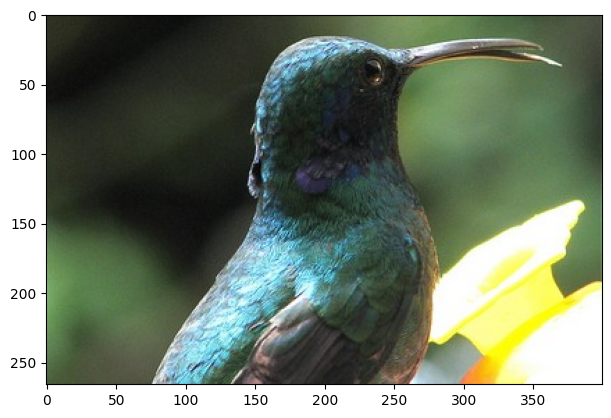

In [83]:
#Menampilkan gambar dari dataset
image = io.imread(aves_path[1])  

#memplot gambar original
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [68]:
files_name = {
    "order Anseriformes":[],
    "order Apodiformes":[],
    "order Apterygiformes":[],
    "order Caprimulgiformes":[],
    "order Casuariiformes":[],
    "order Charadriiformes":[],
    "order Ciconiiformes":[],
    "order Coliiformes":[],
    "order Coraciiformes":[],
    "order Cuculiformes":[],
    "order Falconiformes":[],
    "order Galliformes":[],
    "order Gaviiformes":[],
    "order Gruiformes":[],
    "order Passeriformes":[],
    "order Pelecaniformes":[],
    "order Phoenicopteriformes":[],
    "order Piciformes":[],
    "order Podicipediformes":[],
    "order Procellariiformes":[],
    "order Psittaciformes":[],
    "order Pteroclidiformes":[],
    "order Rheiformes":[],
    "order Sphenisciformes":[],
    "order Struthioniformes":[],
    "order Tinamiformes":[],
    "order Trogoniformes":[],
    "order Turniciformes":[]
}
files_train = {
    "order Anseriformes":[],
    "order Apodiformes":[],
    "order Apterygiformes":[],
    "order Caprimulgiformes":[],
    "order Casuariiformes":[],
    "order Charadriiformes":[],
    "order Ciconiiformes":[],
    "order Coliiformes":[],
    "order Coraciiformes":[],
    "order Cuculiformes":[],
    "order Falconiformes":[],
    "order Galliformes":[],
    "order Gaviiformes":[],
    "order Gruiformes":[],
    "order Passeriformes":[],
    "order Pelecaniformes":[],
    "order Phoenicopteriformes":[],
    "order Piciformes":[],
    "order Podicipediformes":[],
    "order Procellariiformes":[],
    "order Psittaciformes":[],
    "order Pteroclidiformes":[],
    "order Rheiformes":[],
    "order Sphenisciformes":[],
    "order Struthioniformes":[],
    "order Tinamiformes":[],
    "order Trogoniformes":[],
    "order Turniciformes":[]
}
files_test = {
    "order Anseriformes":[],
    "order Apodiformes":[],
    "order Apterygiformes":[],
    "order Caprimulgiformes":[],
    "order Casuariiformes":[],
    "order Charadriiformes":[],
    "order Ciconiiformes":[],
    "order Coliiformes":[],
    "order Coraciiformes":[],
    "order Cuculiformes":[],
    "order Falconiformes":[],
    "order Galliformes":[],
    "order Gaviiformes":[],
    "order Gruiformes":[],
    "order Passeriformes":[],
    "order Pelecaniformes":[],
    "order Phoenicopteriformes":[],
    "order Piciformes":[],
    "order Podicipediformes":[],
    "order Procellariiformes":[],
    "order Psittaciformes":[],
    "order Pteroclidiformes":[],
    "order Rheiformes":[],
    "order Sphenisciformes":[],
    "order Struthioniformes":[],
    "order Tinamiformes":[],
    "order Trogoniformes":[],
    "order Turniciformes":[],
}

In [69]:
for type in files_name.keys():
    for file in os.listdir(os.path.join(source_path, type)):
        if os.path.getsize(os.path.join(source_path, f'{type}/{file}')):
            files_name[type].append(file)
        else:
            print(f'{file} dilewatkan')

In [70]:
#test melihat panjang sebuah folder 
len(files_name['order Turniciformes'])

40

In [71]:
split_point = {
    "order Anseriformes":0,
    "order Apodiformes":0,
    "order Apterygiformes":0,
    "order Caprimulgiformes":0,
    "order Casuariiformes":0,
    "order Charadriiformes":0,
    "order Ciconiiformes":0,
    "order Coliiformes":0,
    "order Coraciiformes":0,
    "order Cuculiformes":0,
    "order Falconiformes":0,
    "order Galliformes":0,
    "order Gaviiformes":0,
    "order Gruiformes":0,
    "order Passeriformes":0,
    "order Pelecaniformes":0,
    "order Phoenicopteriformes":0,
    "order Piciformes":0,
    "order Podicipediformes":0,
    "order Procellariiformes":0,
    "order Psittaciformes":0,
    "order Pteroclidiformes":0,
    "order Rheiformes":0,
    "order Sphenisciformes":0,
    "order Struthioniformes":0,
    "order Tinamiformes":0,
    "order Trogoniformes":0,
    "order Turniciformes":0,
}

for key in split_point.keys():
    split_point[key] = int(len(files_name[key])*.8)

for key in files_train.keys():
    files_train[key].append(files_name[key][:split_point[key]])
    files_test[key].append(files_name[key][split_point[key]:])


In [72]:
len(files_train['order Anseriformes'][0])

32

In [73]:
len(files_test['order Anseriformes'][0])

8

In [75]:
source_path

'D:\\SEMESTER 5\\KB_2_B2\\dataset\\data gambar'

In [74]:
destination_path

'D:\\SEMESTER 5\\KB_2_B2\\dataset\\data gambar used'

In [77]:
for type in files_name.keys():
    for file in files_train[type][0]:
        shutil.copyfile(
            os.path.join(source_path, f'{type}/{file}'),
            os.path.join(destination_path, f'data_training/{type}/{file}')
        )
    for file in files_test[type][0]:
        shutil.copyfile(
            os.path.join(source_path, f'{type}/{file}'),
            os.path.join(destination_path, f'data_testing/{type}/{file}')
        )

## Preprocessing

Text(0.5, 0.98, 'Original & RGB image channels')

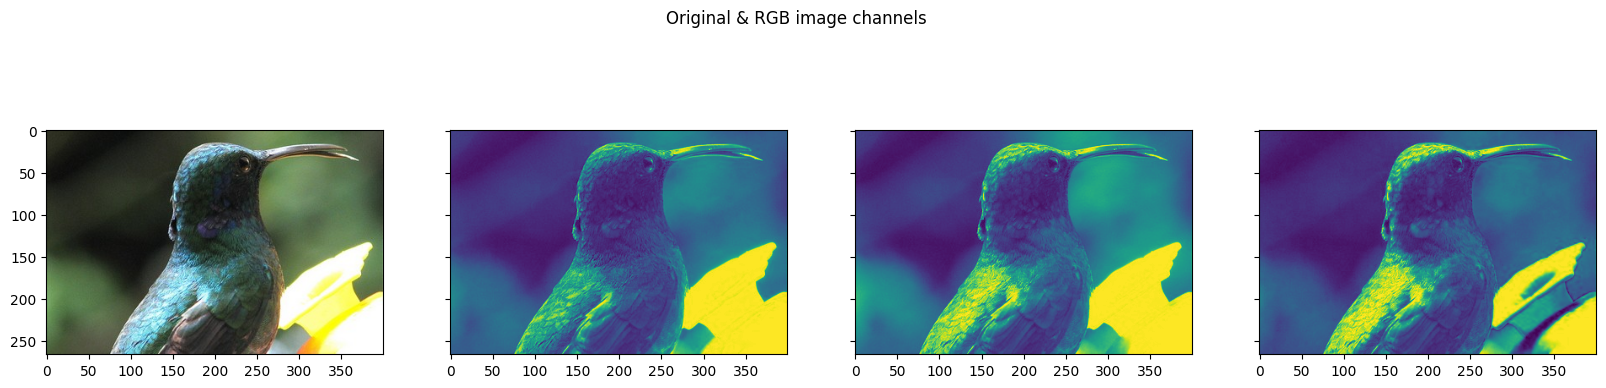

In [84]:
# plotting the original image and the RGB channels  

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

In [3]:
# # gray_image = skimage.color.rgb2gray(image)
# plt.imshow(gray_image, cmap = 'gray')

In [4]:
# norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
# plt.imshow(norm_image)